**Multi-linear Regression**

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read csv file into a pandas dataframe
df = pd.read_csv('mregdata.csv')
df

,id,y,x1,x2,x3
0,1,35,8.4,8.0,1.0
1,2,10,2.0,6.5,8.5
2,3,9,3.5,6.2,6.5
3,4,30,10.4,5.0,1.5
4,5,20,6.5,6.5,7.6
5,6,23,6.2,7.3,4.5
6,7,28,12.4,6.4,4.0
7,8,8,7.0,6.0,10.0
8,9,29,5.8,6.1,6.0
9,10,4,3.0,5.4,11.0


In [3]:
# every row is a data point except the last row
train_df = df[:-1]
test_df = df[-1:]

train_df, test_df

(    id   y    x1   x2    x3
 0    1  35   8.4  8.0   1.0
 1    2  10   2.0  6.5   8.5
 2    3   9   3.5  6.2   6.5
 3    4  30  10.4  5.0   1.5
 4    5  20   6.5  6.5   7.6
 5    6  23   6.2  7.3   4.5
 6    7  28  12.4  6.4   4.0
 7    8   8   7.0  6.0  10.0
 8    9  29   5.8  6.1   6.0
 9   10   4   3.0  5.4  11.0
 10  11  18   6.0  7.3   4.5
 11  12  14   5.5  6.6   5.5
 12  13  32   9.0  6.5   2.5
 13  14   6   1.1  5.8   7.0
 14  15   8   2.1  7.1   9.0
 15  16  37  10.0  8.5   2.0
 16  17  25   7.0  5.5   3.0
 17  18  15   5.0  5.0   4.5
 18  19  30   9.3  7.9   3.0,
     id   y   x1   x2   x3
 19  20  10  4.4  4.5  7.9)

In [4]:
# partition the data into X and y
X_train = train_df.drop(['y', 'id'], axis=1)
y_train = train_df['y']

X_test = test_df.drop(['y', 'id'], axis=1)
y_test = test_df['y']

X_train, y_train, X_test, y_test

(      x1   x2    x3
 0    8.4  8.0   1.0
 1    2.0  6.5   8.5
 2    3.5  6.2   6.5
 3   10.4  5.0   1.5
 4    6.5  6.5   7.6
 5    6.2  7.3   4.5
 6   12.4  6.4   4.0
 7    7.0  6.0  10.0
 8    5.8  6.1   6.0
 9    3.0  5.4  11.0
 10   6.0  7.3   4.5
 11   5.5  6.6   5.5
 12   9.0  6.5   2.5
 13   1.1  5.8   7.0
 14   2.1  7.1   9.0
 15  10.0  8.5   2.0
 16   7.0  5.5   3.0
 17   5.0  5.0   4.5
 18   9.3  7.9   3.0,
 0     35
 1     10
 2      9
 3     30
 4     20
 5     23
 6     28
 7      8
 8     29
 9      4
 10    18
 11    14
 12    32
 13     6
 14     8
 15    37
 16    25
 17    15
 18    30
 Name: y, dtype: int64,
      x1   x2   x3
 19  4.4  4.5  7.9,
 19    10
 Name: y, dtype: int64)

In [5]:
def forward(X, y, theta): 
    m = X.shape[0]
    y_hat = X.dot(theta)
    J = (1/(2*m)) * np.sum((y_hat - y)**2)
    return J, y_hat

def update_theta(X, y_pred, y_true, theta, alpha, index):
    for i in range(len(theta)):
        theta[i] -= (alpha * (y_pred - y_true[index]) * X[index][i])
    return theta

def train(X, y, epochs=10, alpha=0.001, random_state=0):
    num_rows = X.shape[0]
    num_cols = X.shape[1]
    theta = np.random.randn(1,num_cols) / np.sqrt(num_rows)

    #Calculating Loss and Updating Weights
    train_loss = []
    num_epochs = []
    train_indices = [i for i in range(X.shape[0])]
    for j in range(epochs):
        cost = 0
        np.random.seed(random_state)
        np.random.shuffle(train_indices)
        for i in train_indices:
            loss, y_pred = forward(X[i], y[i], theta[0])
            cost += loss
            theta[0] = update_theta(X, y_pred, y, theta[0], alpha, i)
        train_loss.append(cost)
        num_epochs.append(j)
    return theta[0], train_loss, num_epochs

def plot_loss(num_epochs, train_loss):
    plt.plot(num_epochs, train_loss, 'r')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Training Loss')
    plt.title('Training Loss vs Number of Epochs')
    plt.show()

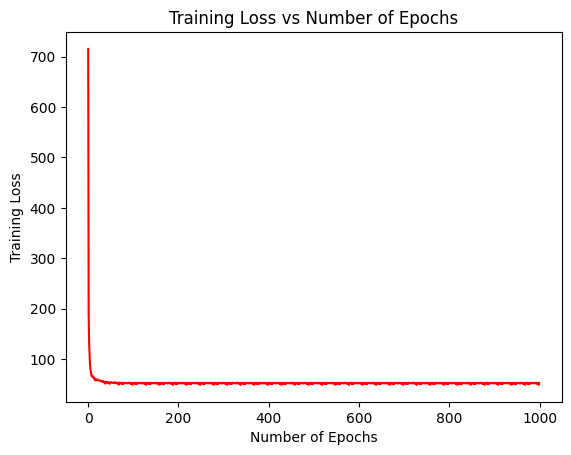

In [6]:
# train the model
theta, train_loss, num_epochs = train(X_train.values, y_train.values, epochs=1000, alpha=0.001, random_state=0)

# plot the loss
plot_loss(num_epochs, train_loss)

In [7]:
# predict the test data
def predict(X, theta):
    y_pred = X.dot(theta)
    return y_pred

y_pred = predict(X_test.values, theta)
y_pred

array([7.28027463])

In [8]:
# print the equation of the line
print('y = ', end='')
for i in range(len(theta)):
    print(f"{theta[i]:.2f}", end='')
    if i != len(theta) - 1:
        print(f"x{i+1} + ", end='')
    else:
        print(f"x{i+1}", end='')

y = 1.67x1 + 2.72x2 + -1.56x3